In [1]:
#Importing the Libraries
import tensorflow as tf
import numpy as np
from numpy import unique,argmax
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
#loading the MNIST Dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))#reshape train data
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))#reshape test data
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [4]:
#Normalizing the Values i.e.,Pixels of Images
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

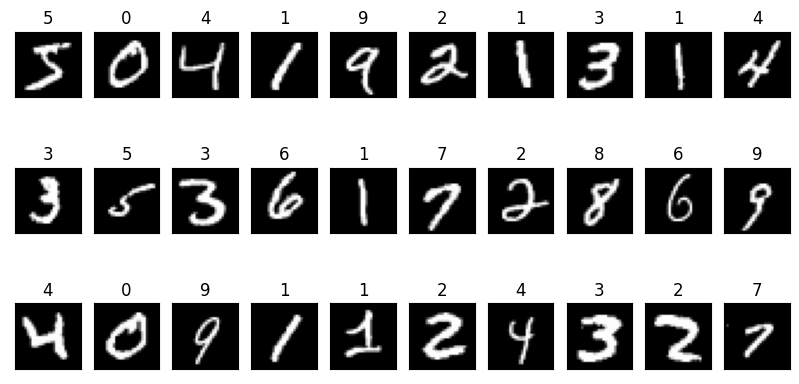

In [5]:
#Lets plot some input images to see
fig = plt.figure(figsize=(10,5))
for i in range(30):
    a=fig.add_subplot(3,10,i+1,xticks=[],yticks=[])#to remove axex
    a.imshow(np.squeeze(x_train[i]),cmap='gray')
    a.set_title(y_train[i])

In [6]:
# Making categorical data . that is labels : (0 to 9) is converted into 1d vector of length 10 
y_train = to_categorical(y_train, num_classes=10)
y_test  = to_categorical(y_test, num_classes=10)
print("Y_train Shape : ",y_train.shape)
print("Y_test Shape : ",y_test.shape)

Y_train Shape :  (60000, 10)
Y_test Shape :  (10000, 10)


In [7]:
#Size of the input images is 28x28. Anyhow lets verify
img_shape=x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [8]:
#Now lets define CNN model
model=Sequential()
#First Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=img_shape))#Convolution
model.add(MaxPool2D(pool_size=(2,2)))#Max Pooling

#Second layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))#Convolution
model.add(MaxPool2D(pool_size=(2,2)))#Max Pooling

#Adding Dropout to avoid overfitting
model.add(Dropout(0.5))

#third layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))#Convolution
model.add(MaxPool2D(pool_size=(2,2)))#Max Pooling

#Adding Dropout to avoid overfitting
model.add(Dropout(0.5))

#Flattening 
model.add(Flatten())

#Dense layers
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0

In [10]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

In [11]:
#Lets Compile the Model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = METRICS)

In [12]:
#Lets Train the Model
history=model.fit(x_train,y_train,epochs=20,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/20
469/469 [==============================] - 6s 8ms/step - loss: 0.6843 - accuracy: 0.7763 - precision: 0.8888 - recall: 0.6937 - val_loss: 0.1465 - val_accuracy: 0.9537 - val_precision: 0.9659 - val_recall: 0.9433
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2877 - accuracy: 0.9123 - precision: 0.9335 - recall: 0.8919 - val_loss: 0.1015 - val_accuracy: 0.9702 - val_precision: 0.9773 - val_recall: 0.9650
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2258 - accuracy: 0.9322 - precision: 0.9474 - recall: 0.9186 - val_loss: 0.0805 - val_accuracy: 0.9771 - val_precision: 0.9837 - val_recall: 0.9716
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1953 - accuracy: 0.9411 - precision: 0.9529 - recall: 0.9300 - val_loss: 0.0714 - val_accuracy: 0.9795 - val_precision: 0.9838 - val_recall: 0.9748
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1713 - accuracy: 0.9484 - pr

In [13]:
print("Training Accuracy : ",history.history['accuracy'][-1]*100)
print("Validation/Testing Accuracy : ",history.history['val_accuracy'][-1]*100)


Training Accuracy :  97.27500081062317
Validation/Testing Accuracy :  98.7500011920929


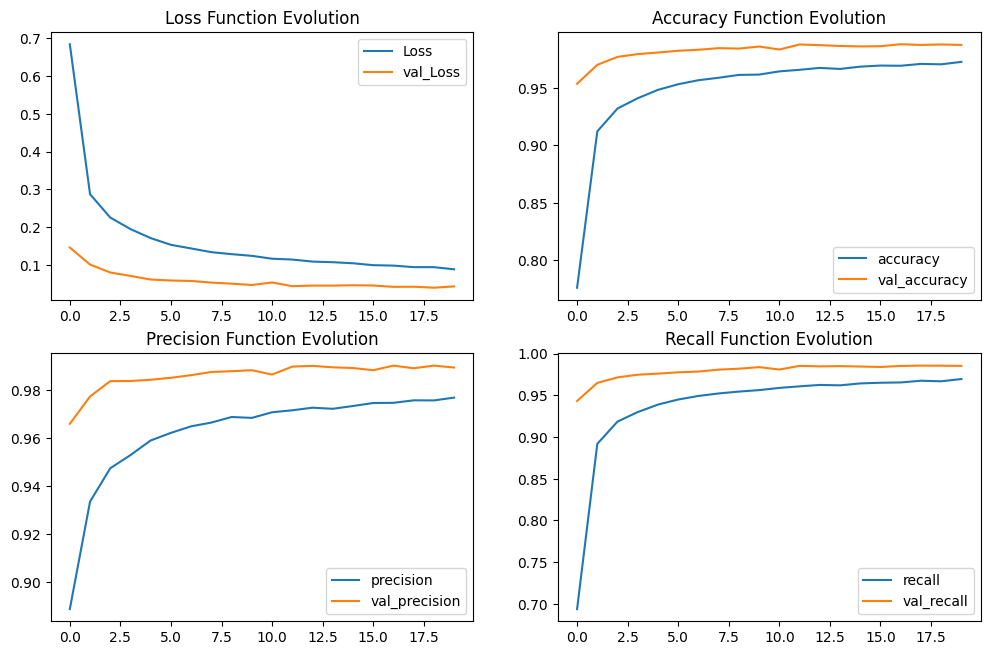

In [14]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(history.history['recall'], label='recall')
plt.plot(history.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

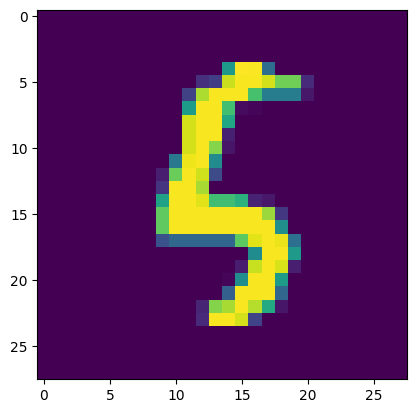

In [15]:
#Lets predict by taking single image as input
idx = 1243
image=x_test[idx]
#Lets plot the image which we predict
plt.imshow(np.squeeze(image))
plt.show()

In [16]:
#Lets predict this image
image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
result=model.predict([image])
print('Predicted : {}'.format(np.argmax(result)))

Predicted : 5
